In [466]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [467]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\Output\arma\commodities\corn\arma_ma\unadjusted\forecasts_corn_(1, 0)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\pnl_test.csv',parse_dates=True,index_col='asofdate')
# pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\Output\arma\commodities\corn\arma_ma\unadjusted\pnl.csv',parse_dates=True,index_col='asofdate')


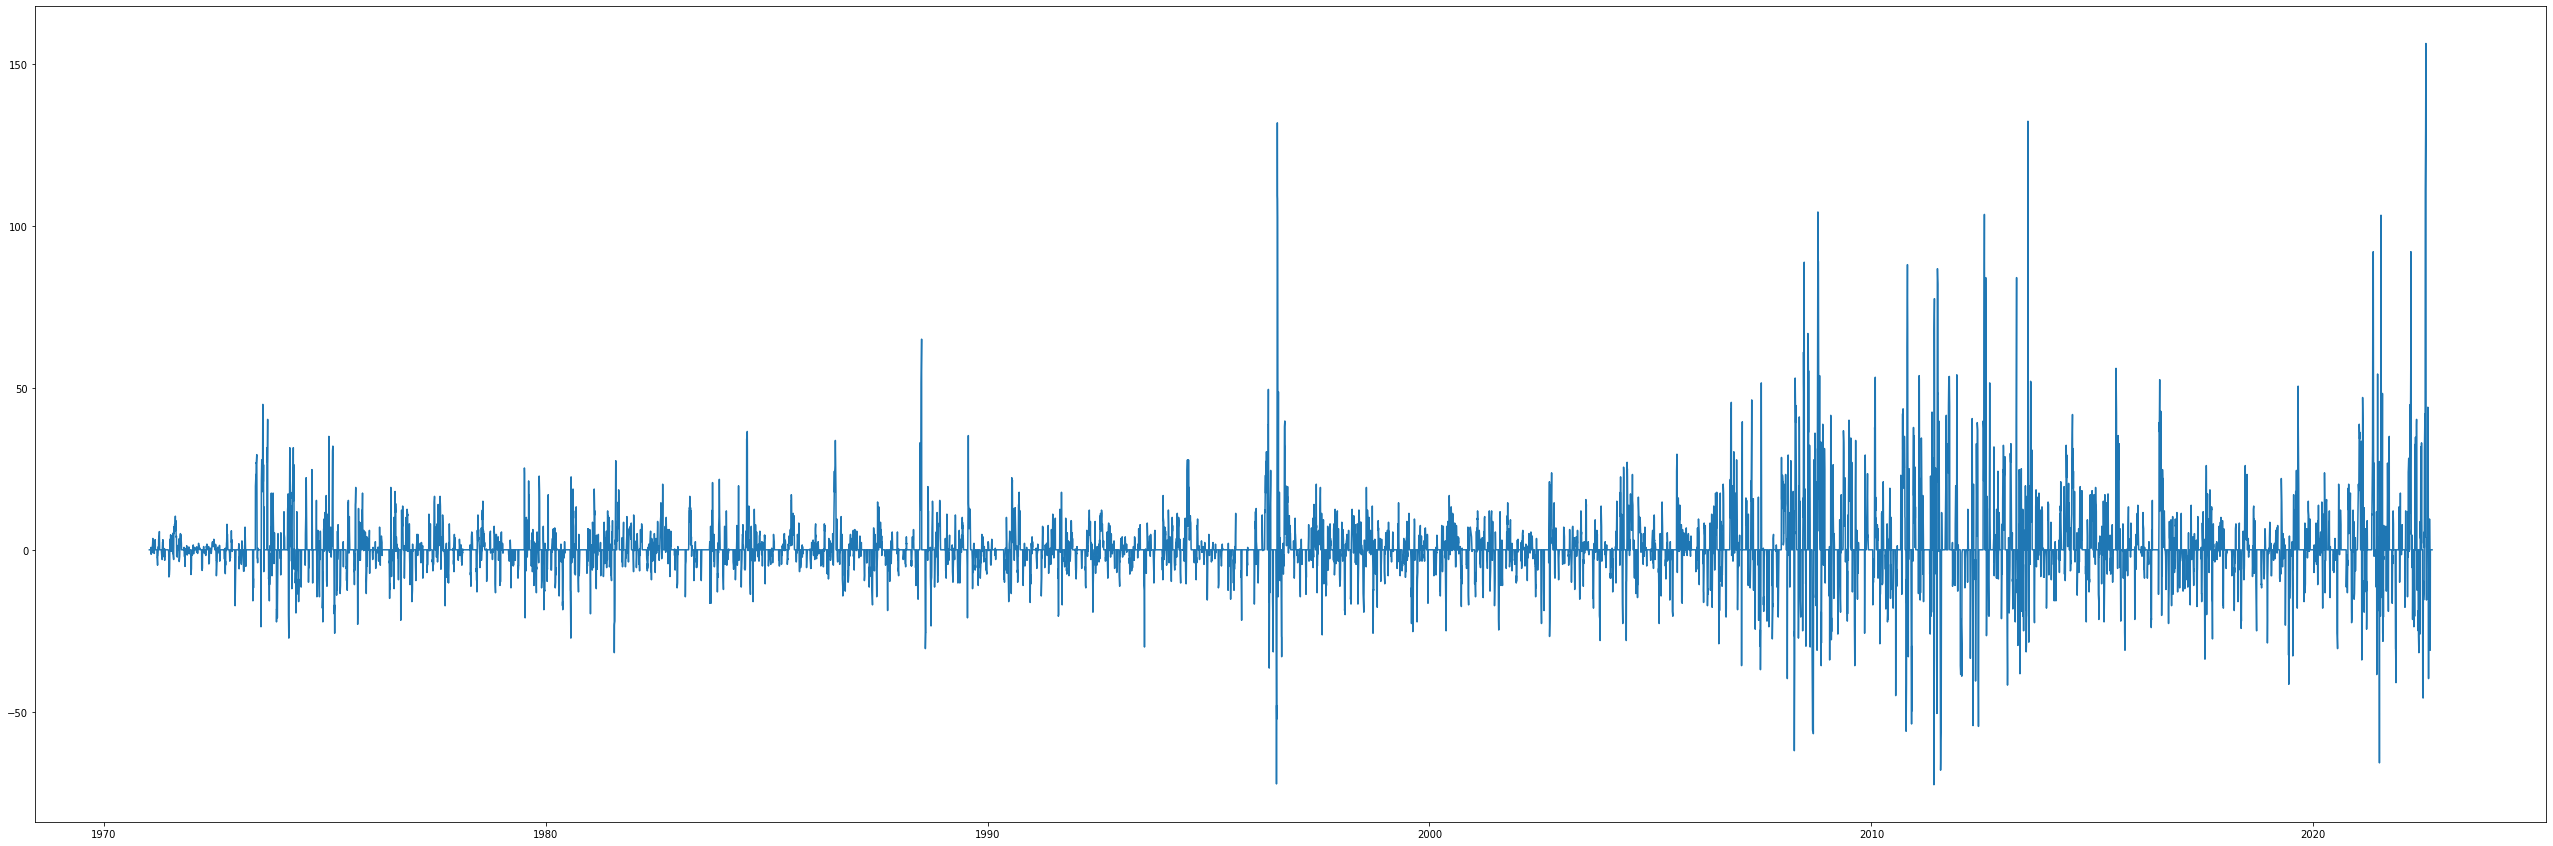

In [468]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

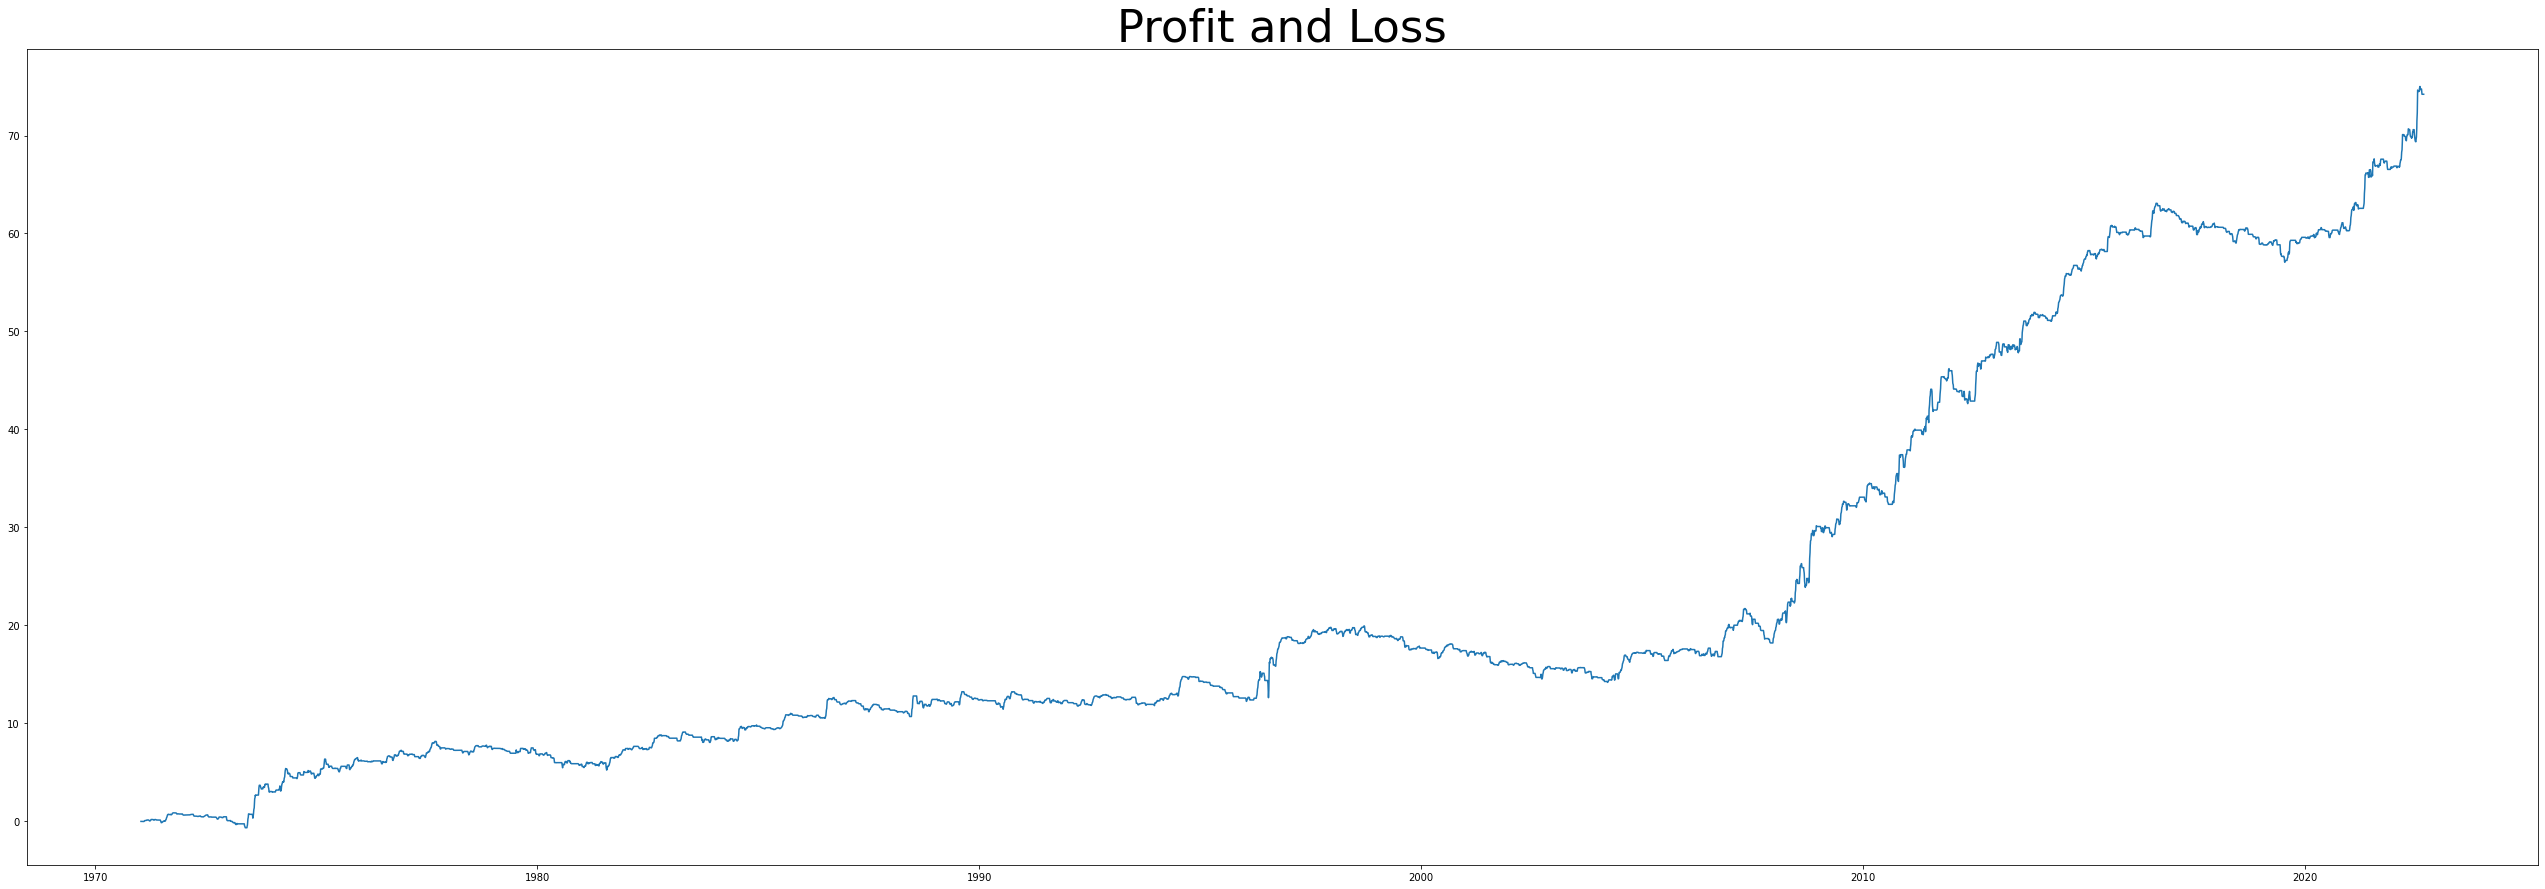

In [469]:
plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(pnl_df['pnl'].cumsum()/forecast_df['close'][0])
plt.show()

In [470]:
forecast_df['close'][0]

156.875

In [471]:
pnl_df['pnl'].head(1)

asofdate
1971-01-13 01:00:00+00:00    0.0
Name: pnl, dtype: float64

In [472]:
np.max(pnl_df['pnl'].cumsum()/forecast_df['close'][0])

75.00557768924303

# List of trades

In [473]:
forecast_df

,time,pointForecast,close,forecastday,product_name,MA_20,MA_50,MA_200,MA_diff_20,MA_diff_50,MA_diff_200
asofdate,,,,,,,,,,,
1971-01-06 01:00:00+00:00,1971-01-06 01:00:00+00:00,157.062683,156.875,1,corn,154.85000,150.4900,140.680625,0.10000,0.1975,0.171250
1971-01-07 01:00:00+00:00,1971-01-07 01:00:00+00:00,157.036825,155.750,2,corn,154.93750,150.5925,140.845000,0.08750,0.1025,0.164375
1971-01-08 01:00:00+00:00,1971-01-08 01:00:00+00:00,157.040385,157.125,3,corn,155.11250,150.7375,141.018125,0.17500,0.1450,0.173125
1971-01-11 01:00:00+00:00,1971-01-11 01:00:00+00:00,157.039895,156.875,4,corn,155.35625,150.8825,141.188750,0.24375,0.1450,0.170625
1971-01-12 01:00:00+00:00,1971-01-12 01:00:00+00:00,157.039963,156.500,5,corn,155.51875,151.0775,141.355625,0.16250,0.1950,0.166875
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 00:00:00+00:00,2022-09-02 00:00:00+00:00,658.765053,664.250,1,corn,642.65000,628.9000,678.347500,2.76250,-1.5900,0.470000
2022-09-05 00:00:00+00:00,2022-09-05 00:00:00+00:00,659.096065,676.000,2,corn,645.97500,627.4300,678.851250,3.32500,-1.4700,0.503750
2022-09-07 00:00:00+00:00,2022-09-07 00:00:00+00:00,659.104725,670.250,3,corn,648.70000,625.9700,679.337500,2.72500,-1.4600,0.486250


In [474]:
merge_df = pnl_df.merge(forecast_df, left_on='asofdate', right_on='asofdate')

In [475]:
positions = merge_df[(merge_df['forecastday'] == 5)][['pnl','pointForecast','forecastday','product_name']]

In [476]:
positions[positions['pnl']!=0]

,pnl,pointForecast,forecastday,product_name
asofdate,,,,
1971-02-02 01:00:00+00:00,-0.375,155.280333,5,corn
1971-02-09 01:00:00+00:00,1.750,154.397422,5,corn
1971-02-17 01:00:00+00:00,0.875,153.145108,5,corn
1971-02-24 01:00:00+00:00,1.250,151.002873,5,corn
1971-03-03 01:00:00+00:00,2.125,149.370469,5,corn
...,...,...,...,...
2022-07-14 00:00:00+00:00,102.500,609.525045,5,corn
2022-07-21 00:00:00+00:00,54.500,605.899552,5,corn
2022-07-28 00:00:00+00:00,3.500,575.015654,5,corn


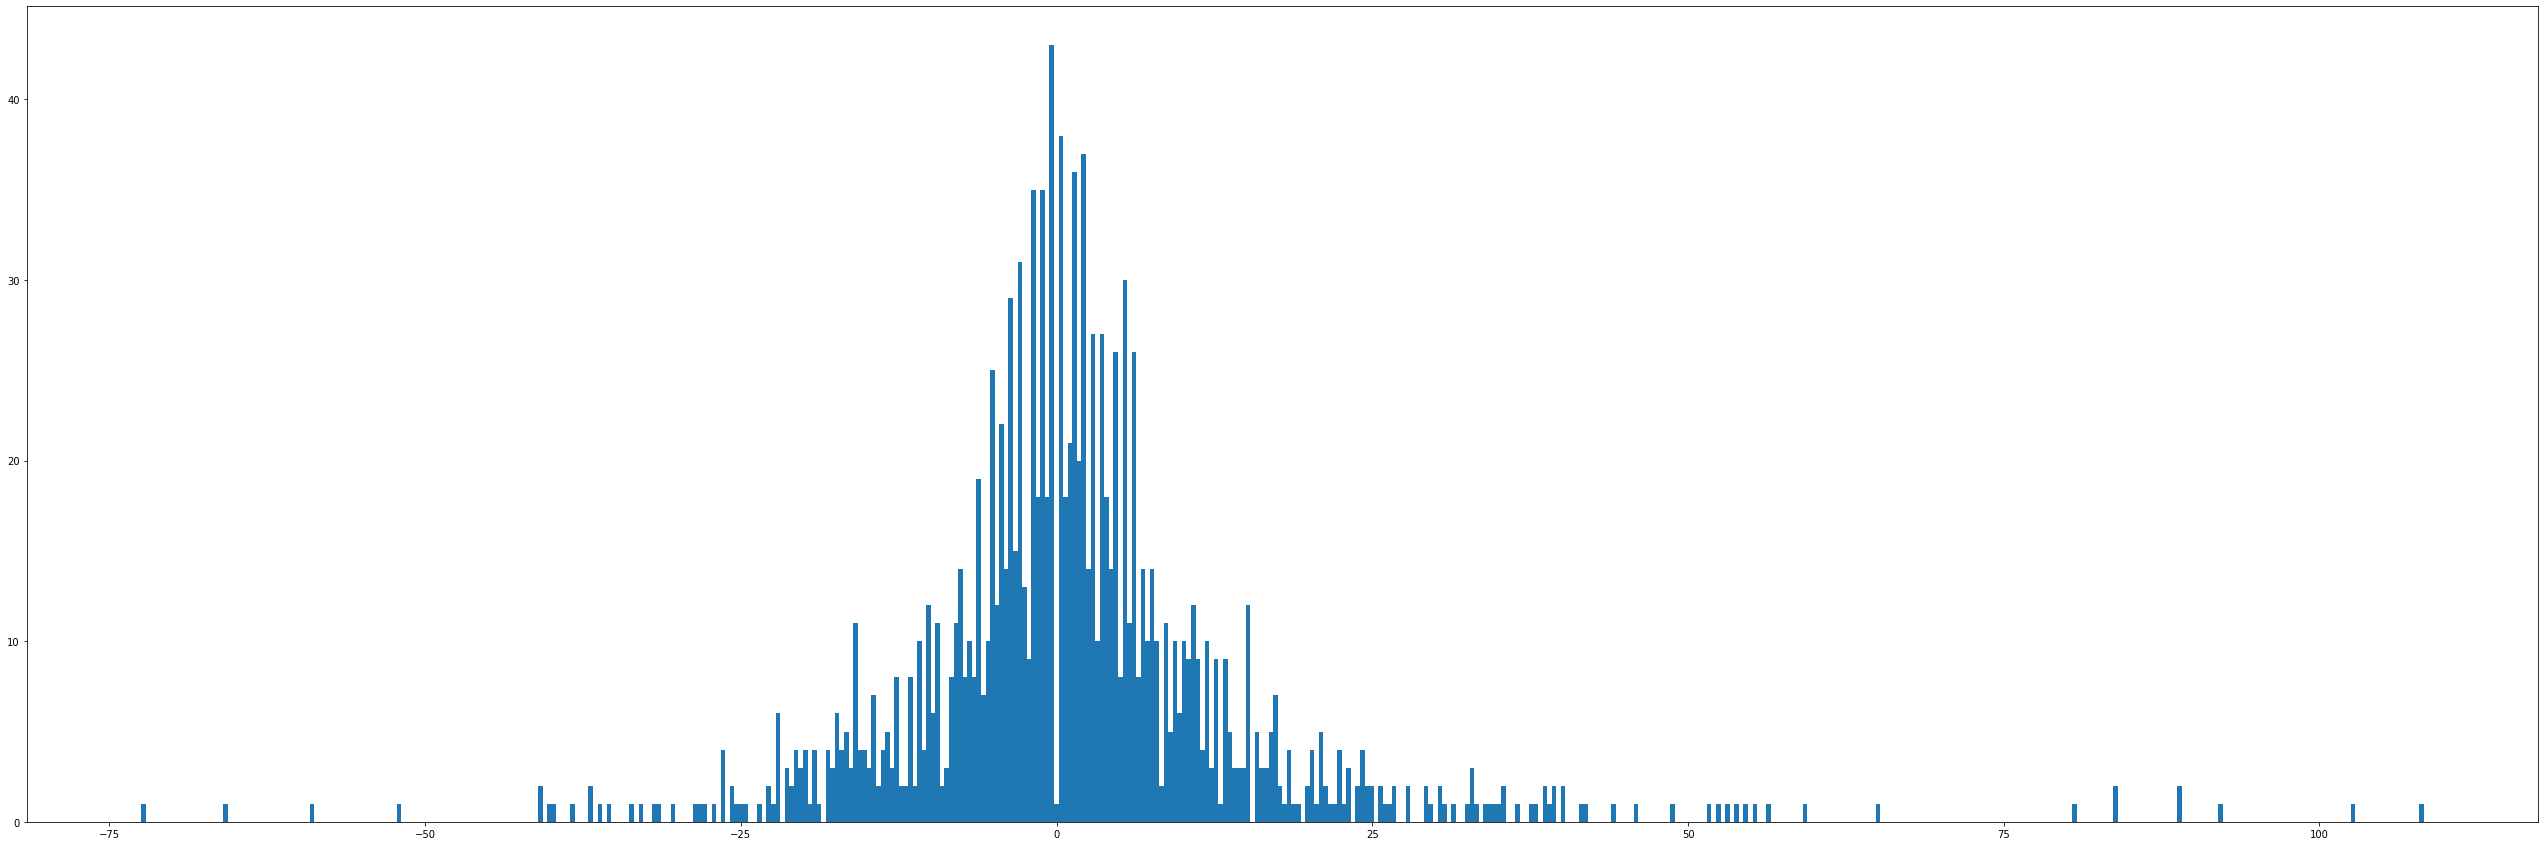

In [477]:
plt.figure(figsize=(45,15))

plt.hist(positions['pnl'][positions['pnl'] != 0],bins=500)

plt.show()

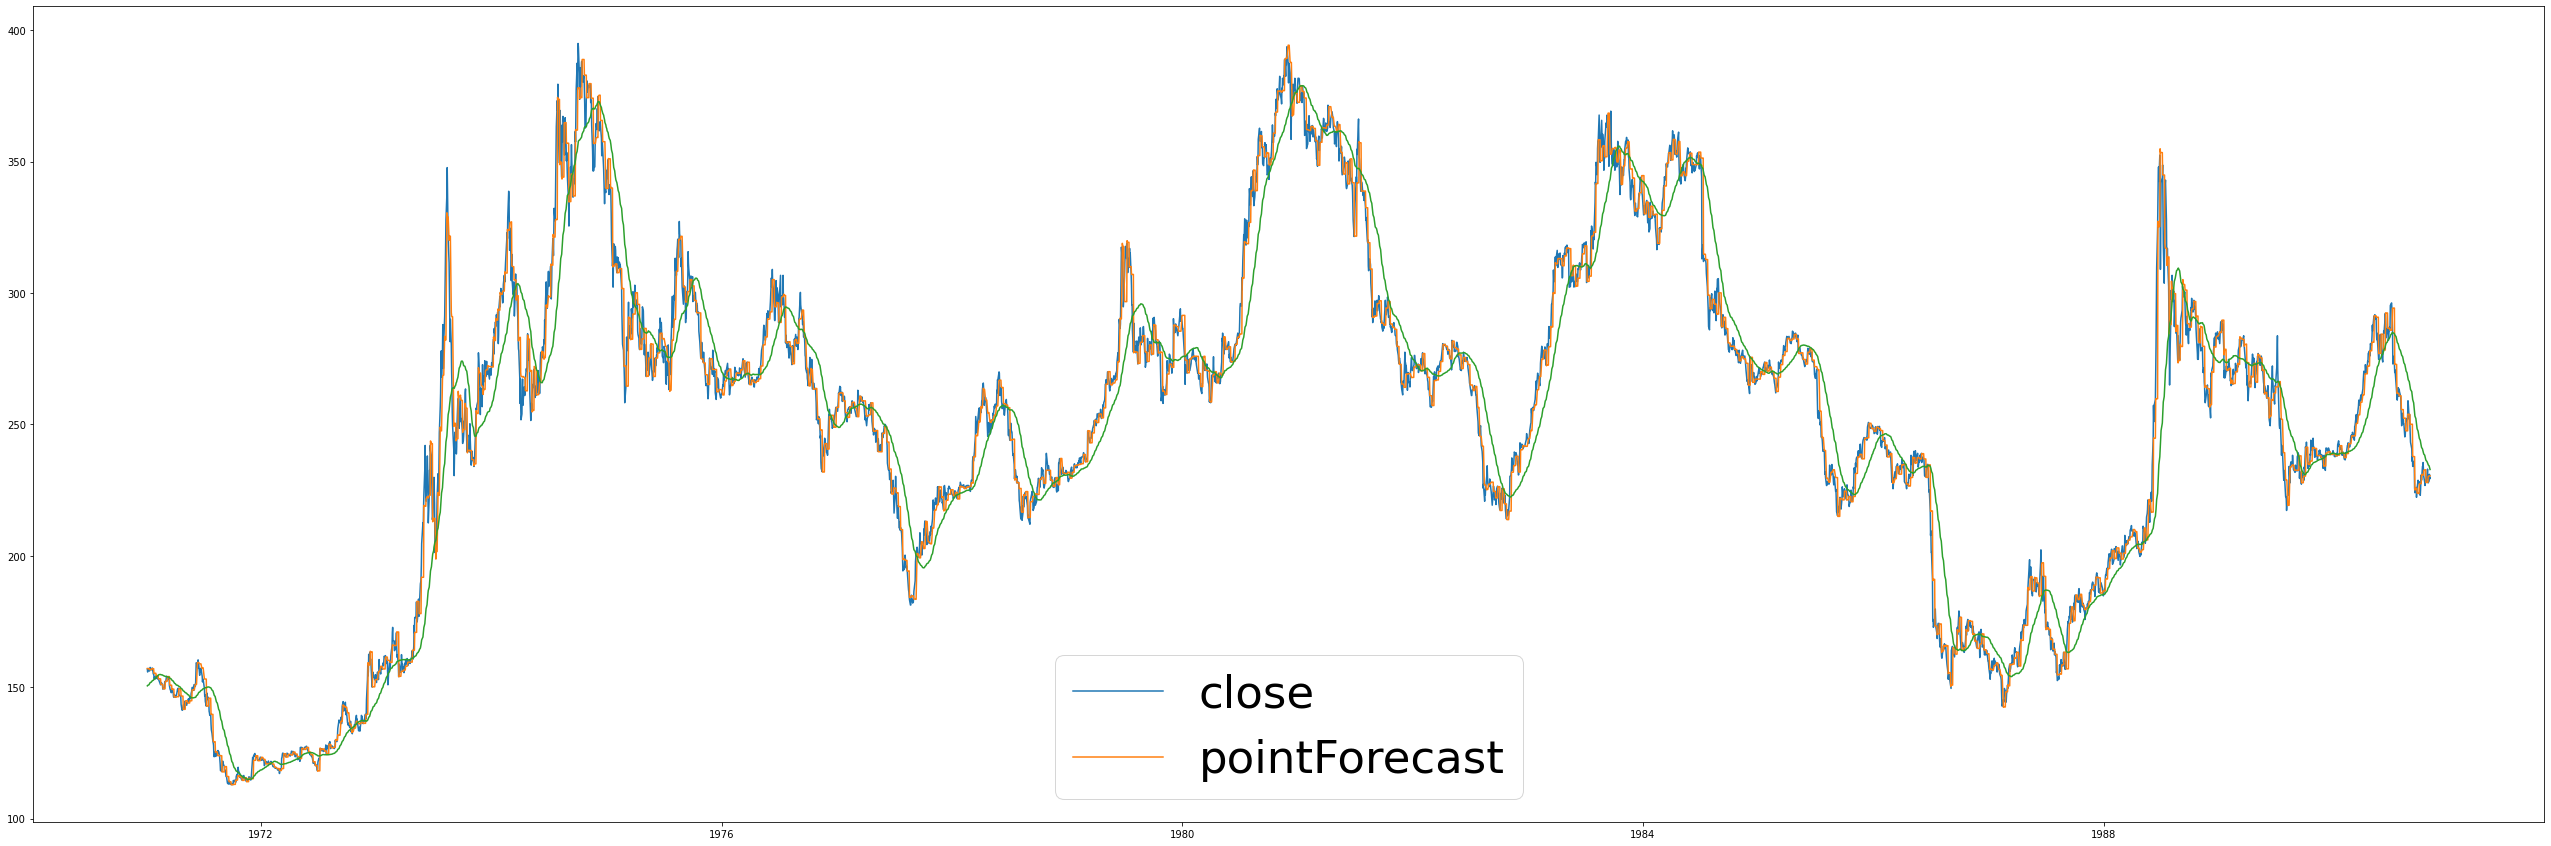

In [478]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'][0:5000])
plt.plot(forecast_df['pointForecast'][0:5000])
plt.plot(forecast_df['MA_50'][0:5000])

plt.legend(['close','pointForecast'],fontsize=45)

plt.savefig(r'pnl.jpg')

plt.show()

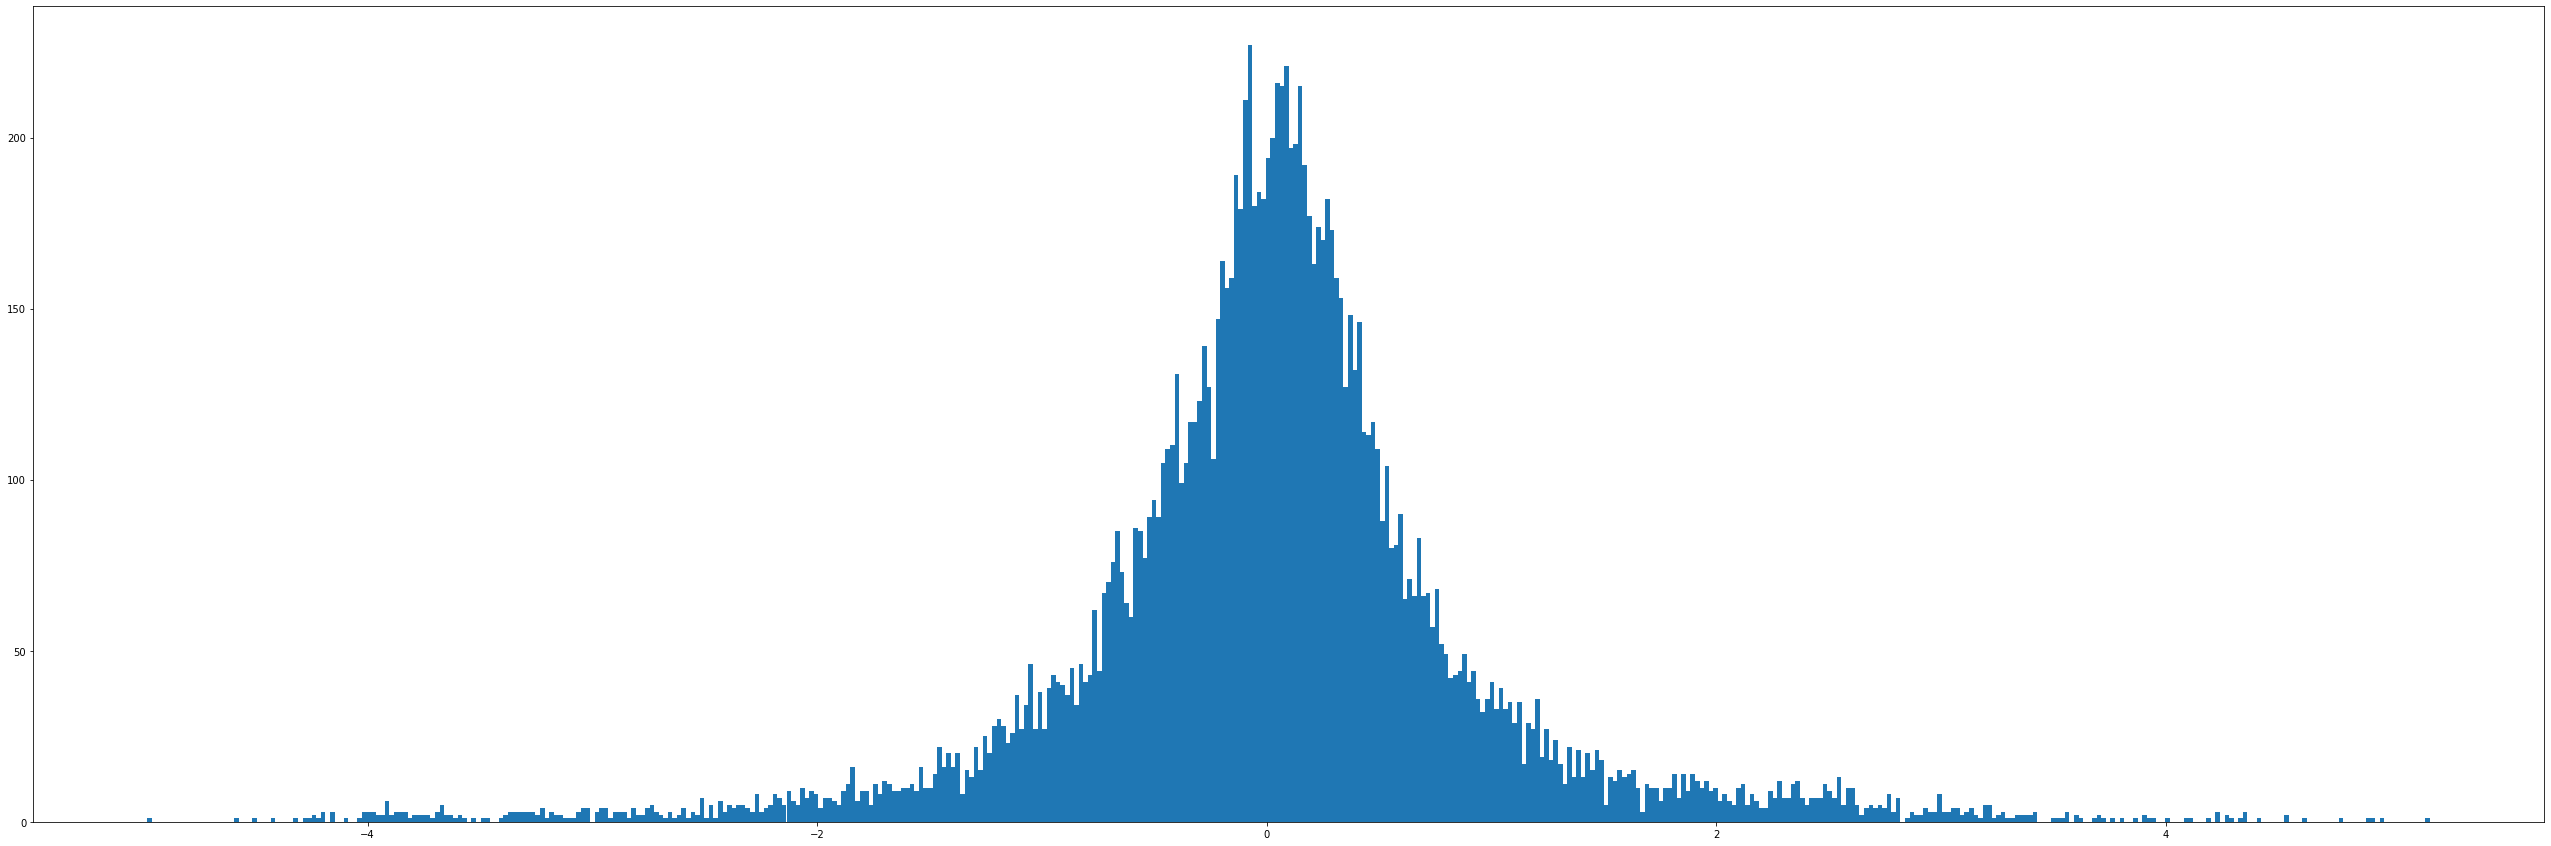

In [479]:


plt.figure(figsize=(45,15))

plt.hist(forecast_df['MA_diff_50'],bins=500)

plt.show()